In [2]:
#import libraries and dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import linregress
import sqlite3

In [3]:
#read DIB CSV file into pandas
dib_path = 'DIB dataset.csv'

# Read CSV file into a DataFrame
dib_df = pd.read_csv(dib_path)
dib_df.head()

,ID,Age,Religion,Ethnicity,Marital status,Marriage period,No. of children,Educational level,Employment status,Working period,...,JS33,JS34,JS35,JS36,JP1,JP2,JP3,JP4,JP5,JP6
0,1,2,1,1,1,1,1,6,1,4,...,4,5,5,4,4,4,4,2,5,5
1,2,2,1,1,1,2,1,6,1,3,...,3,5,5,5,5,5,4,5,5,5
2,3,2,1,1,1,2,1,6,1,5,...,5,5,5,5,5,5,5,5,5,5
3,4,3,1,1,2,1,2,5,1,5,...,5,5,5,5,2,2,2,4,5,5
4,5,2,1,1,1,1,1,6,1,3,...,5,5,5,5,5,5,5,5,5,5


In [4]:
#Count the number of columns in dib_df

column_count = len(dib_df.columns)

print("Number of columns:", column_count)


Number of columns: 95


In [5]:
#Define columns to keep
columns_to_keep= ['ID', 'Age', 'Religion', 'Ethnicity', 'Marital status', 'Marriage period', 'No. of children', 'Educational level', 'Employment status', 'Working period', 'Household income', 'Sperm quality' ]

In [6]:
#Produce dataframe with only necessary columns
dib_reduced_df= dib_df[columns_to_keep]
dib_reduced_df.head()

,ID,Age,Religion,Ethnicity,Marital status,Marriage period,No. of children,Educational level,Employment status,Working period,Household income,Sperm quality
0,1,2,1,1,1,1,1,6,1,4,7,3
1,2,2,1,1,1,2,1,6,1,3,4,1
2,3,2,1,1,1,2,1,6,1,5,7,1
3,4,3,1,1,2,1,2,5,1,5,10,1
4,5,2,1,1,1,1,1,6,1,3,5,1


In [7]:
#Count columns in new dataframe 
column_count2 = len(dib_reduced_df.columns)

print("Number of columns:", column_count2)

Number of columns: 12


In [8]:
#import pandas dataframe into SQLite database

# Create a SQLite database connection
conn = sqlite3.connect('dib_data.db')

# Write DataFrame to a table called 'dib_table'
dib_reduced_df.to_sql('dib_table', conn, index=False, if_exists='replace')

# Commit changes and close the connection
conn.commit()
conn.close()

print("Database created successfully.")



Database created successfully.


In [9]:
#read female_birth_rate into pandas
fem_birth_path= 'female_birth_rate.csv'

In [10]:
#diplay female_birth_rate as dataframe
fem_birth_df = pd.read_csv(fem_birth_path)

# Display the DataFrame
fem_birth_df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,...,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,...,4.677618,4.615670,4.570409,4.527705,4.482898,4.416900,4.354709,NaN,NaN,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,...,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,...,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662,NaN,NaN,NaN
4,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,...,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,NaN,NaN,NaN


In [11]:
#drop column that are either uneccesary or contain no data
columns_to_drop = ["2022", "2023"]
fem_birth_df.drop(columns=columns_to_drop, inplace=True)

# Display the DataFrame after dropping the columns
fem_birth_df.head()



,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 68
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,...,2.11700,2.148000,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000,NaN
1,Africa Eastern and Southern,AFE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,...,4.80882,4.739861,4.677618,4.615670,4.570409,4.527705,4.482898,4.416900,4.354709,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,...,5.69600,5.560000,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000,NaN
3,Africa Western and Central,AFW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,...,5.50635,5.437493,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662,NaN
4,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,...,5.95300,5.864000,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,NaN


In [12]:
#create connection from fem_birth_df to SQLite db
conn = sqlite3.connect('fem_birth_rate.db')

# Write DataFrame to a table called 'fem_birth_table'
fem_birth_df.to_sql('fem_birth_table', conn, index=False, if_exists='replace')

# Commit changes and close the connection
conn.commit()
conn.close()

print("Database created successfully.")


Database created successfully.


In [16]:
#calculate average births per women in 1960 (first year)
avg_birth_1960= fem_birth_df['1960'].mean()
avg_birth_1960.round(2)

5.44

In [17]:
#calculate average birth per woman in 2021 (final year)
avg_birth_2021= fem_birth_df['2021'].mean()
avg_birth_2021.round(2)

2.54

In [23]:
#find average births per woman per year in df 
# Filter columns with year labels
year_columns = [col for col in fem_birth_df.columns if col.isdigit()]

# Calculate average value for each year column
average_per_year = fem_birth_df[year_columns].mean().round(2)

#show max rows
pd.set_option('display.max_rows', None)

print("Average birth per women per year:")
print(average_per_year)


Average birth per women per year:
1960    5.44
1961    5.42
1962    5.46
1963    5.49
1964    5.43
1965    5.38
1966    5.32
1967    5.27
1968    5.23
1969    5.17
1970    5.12
1971    5.06
1972    4.99
1973    4.90
1974    4.83
1975    4.74
1976    4.68
1977    4.61
1978    4.56
1979    4.52
1980    4.48
1981    4.43
1982    4.38
1983    4.33
1984    4.27
1985    4.22
1986    4.17
1987    4.10
1988    4.05
1989    3.98
1990    3.93
1991    3.85
1992    3.78
1993    3.70
1994    3.62
1995    3.54
1996    3.48
1997    3.41
1998    3.34
1999    3.29
2000    3.24
2001    3.18
2002    3.14
2003    3.10
2004    3.07
2005    3.03
2006    3.01
2007    2.99
2008    2.98
2009    2.96
2010    2.92
2011    2.90
2012    2.87
2013    2.84
2014    2.81
2015    2.78
2016    2.74
2017    2.69
2018    2.65
2019    2.61
2020    2.56
2021    2.54
dtype: float64


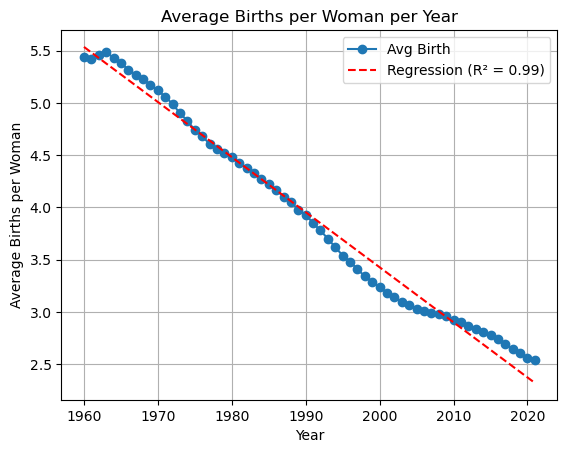

In [26]:
#create line graph showing birth rates globally
average_birth_per_year = {
    1960: 5.44,
    1961: 5.42,
    1962: 5.46,
    1963: 5.49,
    1964: 5.43,
    1965: 5.38,
    1966: 5.32,
    1967: 5.27,
    1968: 5.23,
    1969: 5.17,
    1970: 5.12,
    1971: 5.06,
    1972: 4.99,
    1973: 4.90,
    1974: 4.83,
    1975: 4.74,
    1976: 4.68,
    1977: 4.61,
    1978: 4.56,
    1979: 4.52,
    1980: 4.48,
    1981: 4.43,
    1982: 4.38,
    1983: 4.33,
    1984: 4.27,
    1985: 4.22,
    1986: 4.17,
    1987: 4.10,
    1988: 4.05,
    1989: 3.98,
    1990: 3.93,
    1991: 3.85,
    1992: 3.78,
    1993: 3.70,
    1994: 3.62,
    1995: 3.54,
    1996: 3.48,
    1997: 3.41,
    1998: 3.34,
    1999: 3.29,
    2000: 3.24,
    2001: 3.18,
    2002: 3.14,
    2003: 3.10,
    2004: 3.07,
    2005: 3.03,
    2006: 3.01,
    2007: 2.99,
    2008: 2.98,
    2009: 2.96,
    2010: 2.92,
    2011: 2.90,
    2012: 2.87,
    2013: 2.84,
    2014: 2.81,
    2015: 2.78,
    2016: 2.74,
    2017: 2.69,
    2018: 2.65,
    2019: 2.61,
    2020: 2.56,
    2021: 2.54
}

# Extract years and average births
years = list(average_birth_per_year.keys())
average_births = list(average_birth_per_year.values())

# Create the line plot
plt.plot(years, average_births, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Births per Woman')
plt.title('Average Births per Woman per Year')


# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(years, average_births)

# Add regression line to plot
plt.plot(years, [slope * year + intercept for year in years], color='red', linestyle='--')

# Display the plot
plt.grid(True)
plt.legend(['Avg Birth', f'Regression (R² = {r_value**2:.2f})'])
plt.show()